# Prosper loan Data Exploration
## by Adebajo Ruth Oluwadamilola

## Table of Content

<ul>
<li><a href="#investigation overview">Investigation Overview</a></li>
<li><a href="#dataset overview">Dataset Overview</a></li>
    
</ul>

## Investigation Overview

This presentation is based on exploring the attributes of loans that had more percent of funding.

## Dataset Overview

Loan Data from Prosper, provided by Udacity. It was downloaded using the link; https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000 . This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

Importing Python libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

Load dataset

In [2]:
#Load data
df_loan = pd.read_csv('cleaned_Loan_prosper_data.csv')

In [3]:
#load loan data to visually access it
df_loan

,Unnamed: 0,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded
0,0,Completed,0.1380,C,Not AVilable,CO,Other,Self-employed,True,True,...,12.0,0.17,True,Q3,330.43,0,0,0.0,258,1.0
1,1,Current,0.0820,A,HOme Improvement,CO,Professional,Employed,False,False,...,29.0,0.18,True,Q1,318.93,0,0,0.0,1,1.0
2,2,Completed,0.2400,HR,Not AVilable,GA,Other,Not available,False,True,...,3.0,0.06,True,Q1,123.32,0,0,0.0,41,1.0
3,3,Current,0.0874,A,Motorcycle,GA,Skilled Labor,Employed,True,False,...,29.0,0.15,True,Q4,321.45,0,0,0.0,158,1.0
4,4,Current,0.1985,D,HOme Improvement,MN,Executive,Employed,True,False,...,49.0,0.26,True,Q3,563.97,0,0,0.0,20,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111402,113932,Current,0.1764,C,Debt Consolidation,IL,Food Service Management,Employed,True,False,...,41.0,0.13,True,Q2,364.74,0,0,0.0,1,1.0
111403,113933,FinalPaymentInProgress,0.1010,A,Other,PA,Professional,Employed,True,False,...,39.0,0.11,True,Q4,65.57,0,0,0.0,22,1.0
111404,113934,Current,0.2050,D,Debt Consolidation,TX,Other,Employed,True,False,...,25.0,0.51,True,Q4,273.35,0,0,0.0,119,1.0
111405,113935,Completed,0.2505,C,HOme Improvement,GA,Food Service,Full-time,True,False,...,22.0,0.48,True,Q4,449.55,0,0,0.0,274,1.0


Define the ordinal and nominal data

In [4]:
#ordinal category
ordinal_categorical = {'ProsperRating (Alpha)':['AA','A','B','C','D','E','HR'],
                       'LoanOriginationQuarter': ['Q1', 'Q2', 'Q3', 'Q4']
                      }


#nominal categorical
nominal_categorical = ['EmploymentStatus','LoanStatus', 'BorrowerState', 'Occupation']

In [5]:
for var in ordinal_categorical:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_categorical[var])
    df_loan[var] = df_loan[var].astype(ordered_var)
        
for var in nominal_categorical:
    df_loan[var] = df_loan[var].astype('category')
    

Test

In [6]:
print(df_loan[ordinal_categorical].dtypes, end = '\n\nnominal data \n')
print(df_loan[nominal_categorical].dtypes)

ProsperRating (Alpha)     category
LoanOriginationQuarter    category
dtype: object

nominal data 
EmploymentStatus    category
LoanStatus          category
BorrowerState       category
Occupation          category
dtype: object


In [7]:
#Check top rows of the data
df_loan.head()

,Unnamed: 0,LoanStatus,LenderYield,ProsperRating (Alpha),ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,...,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeVerifiable,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PercentFunded
0,0,Completed,0.1380,C,Not AVilable,CO,Other,Self-employed,True,True,...,12.0,0.17,True,Q3,330.43,0,0,0.0,258,1.0
1,1,Current,0.0820,A,HOme Improvement,CO,Professional,Employed,False,False,...,29.0,0.18,True,Q1,318.93,0,0,0.0,1,1.0
2,2,Completed,0.2400,HR,Not AVilable,GA,Other,Not available,False,True,...,3.0,0.06,True,Q1,123.32,0,0,0.0,41,1.0
3,3,Current,0.0874,A,Motorcycle,GA,Skilled Labor,Employed,True,False,...,29.0,0.15,True,Q4,321.45,0,0,0.0,158,1.0
4,4,Current,0.1985,D,HOme Improvement,MN,Executive,Employed,True,False,...,49.0,0.26,True,Q3,563.97,0,0,0.0,20,1.0


In [8]:
def boxplots(fig_width, fig_height,  cat_data, num_data, data, title):

    plt.figure(figsize = (fig_width, fig_height))
    sb.boxplot(x = cat_data, y = num_data, data = data, color = 'teal')
    plt.title(title, fontdict = {'fontweight': 'bold', 'fontsize' : 24}, pad = 24)
    plt.xticks(rotation = 90);
    plt.subplots_adjust(hspace = 1.4)
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'{num_data}', fontdict = {'weight': 'bold'})

In [9]:
def full_funding(cat_data, title, fig_size = None):

    if fig_size != None:
        plt.figure(figsize = fig_size)
    full_funding = data[data['PercentFunded'] == 1]
    sb.countplot(x = cat_data, data = full_funding, color = 'brown')
    plt.xticks(rotation = 90);
    plt.title(f'count of {title} that had full percent funding', 
             fontdict = {'fontweight': 'bold', 'fontsize' : 24});
    plt.xlabel(f'{cat_data}', fontdict = {'weight': 'bold'})
    plt.ylabel(f'Count of {cat_data} for \n loans with full funding', fontdict = {'weight': 'bold'})

In [10]:
not_including_1 = df_loan[df_loan['PercentFunded'] < 1]

## Relationship between Percent Funded and Loan status for not fully funded loans

- Loans that are not fully funded with Loan status of past Due(31-60 days) have larger range of PercentFunded than other status, with most percent Funding between 77% to 82%


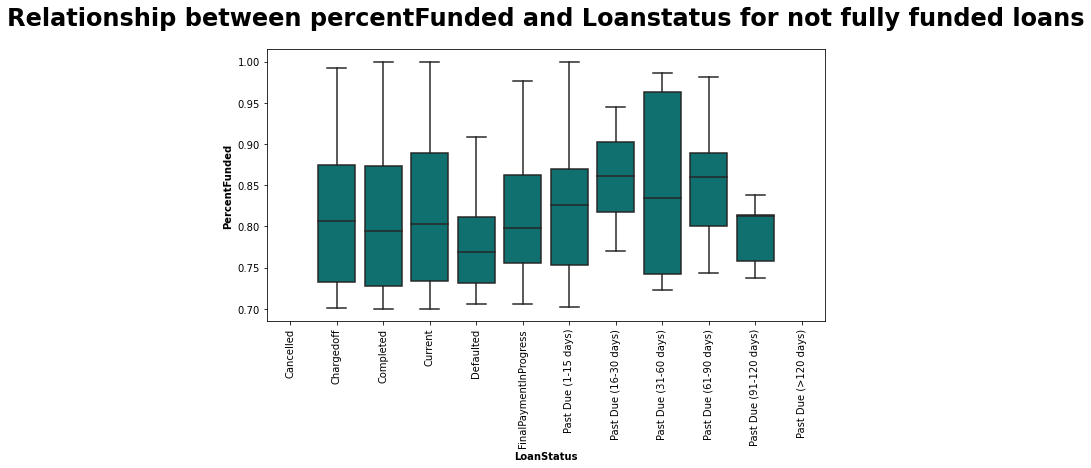

In [11]:
boxplots(10, 5, 'LoanStatus', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Loanstatus for not fully funded loans')

## Relationship between Percent Funded and Prosper Rating for not fully funded loans

- Prosper Rating of C has more percent funded compared to others

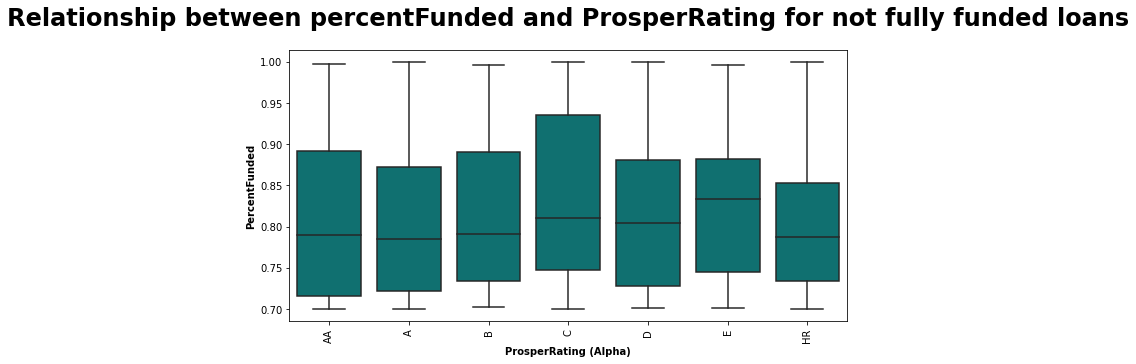

In [12]:
boxplots(10, 5, 'ProsperRating (Alpha)', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ProsperRating for not fully funded loans')


##  Relationship between Percent Funded and Listing Category for not fully funded loans

- For not fully funded loans, Loans for HomeImprovement, Business, Debt Consolidation, Household Expenses, Medical/Dental and other had largest range of Percent Funded, while Loans for baby and Adoption, Cosmetic Procedures, Green Loans,Not available had the least range with their values being around 81%, 85%, 71% and 83% respectively. The least percent vacation gets is more than other categories.

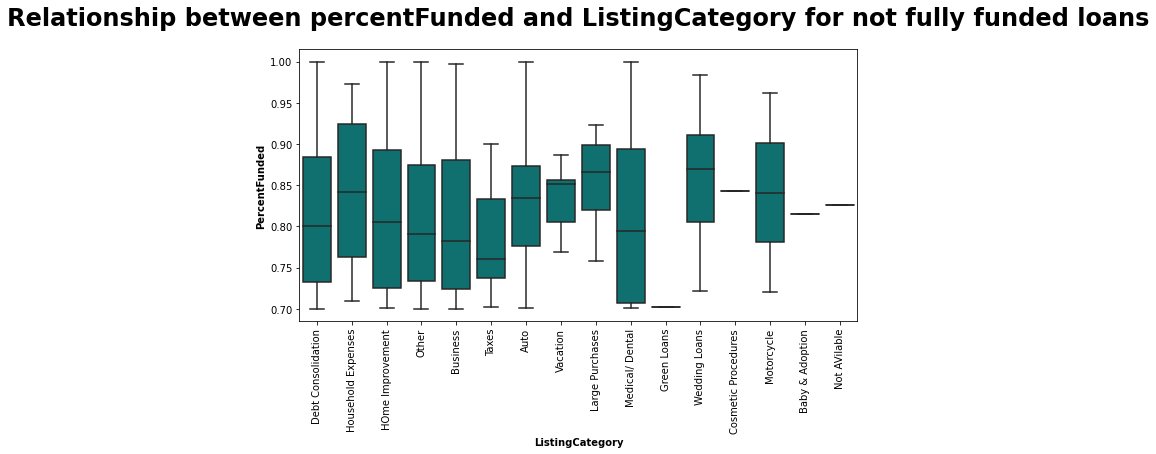

In [13]:
boxplots(10, 5, 'ListingCategory', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and ListingCategory for not fully funded loans')

## Relationship between Percent Funded and Borrower State for not fully funded loans

- Utah, New Mexico, Alaska, Washington had lower Percent Funding
- Nevada, Idaho had high percent funded

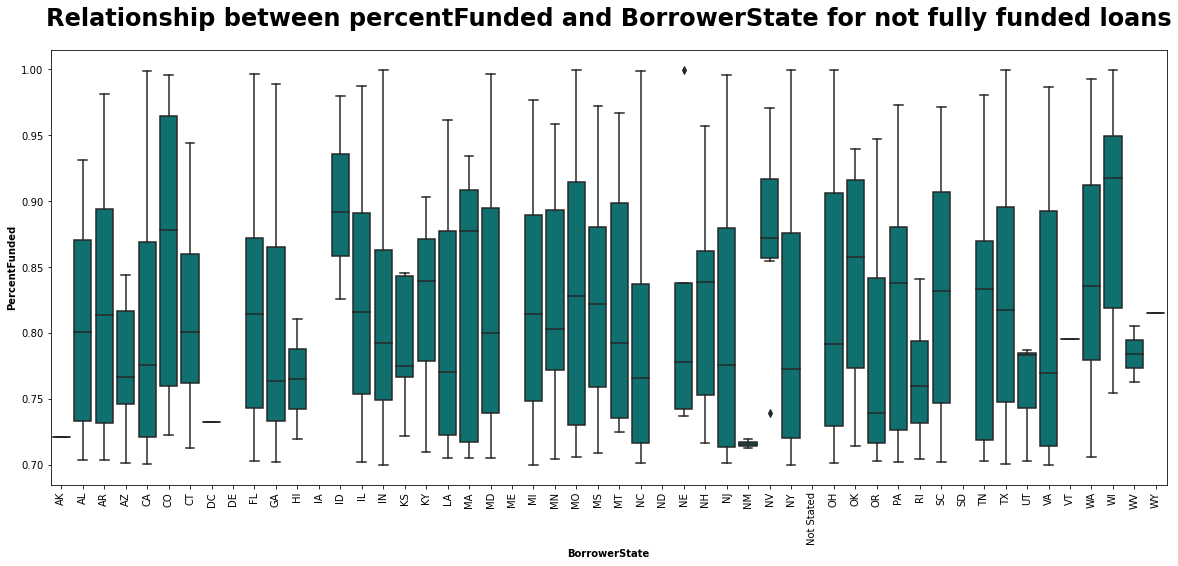

In [14]:
boxplots(20, 8, 'BorrowerState', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and BorrowerState for not fully funded loans')

## Relationship between Percent Funded and Occupation for not fully funded loans

- Occupations of Car dealers, Mechanical engineering had high percent funded,
- Fireman, chemical engineer had lower percentFunded

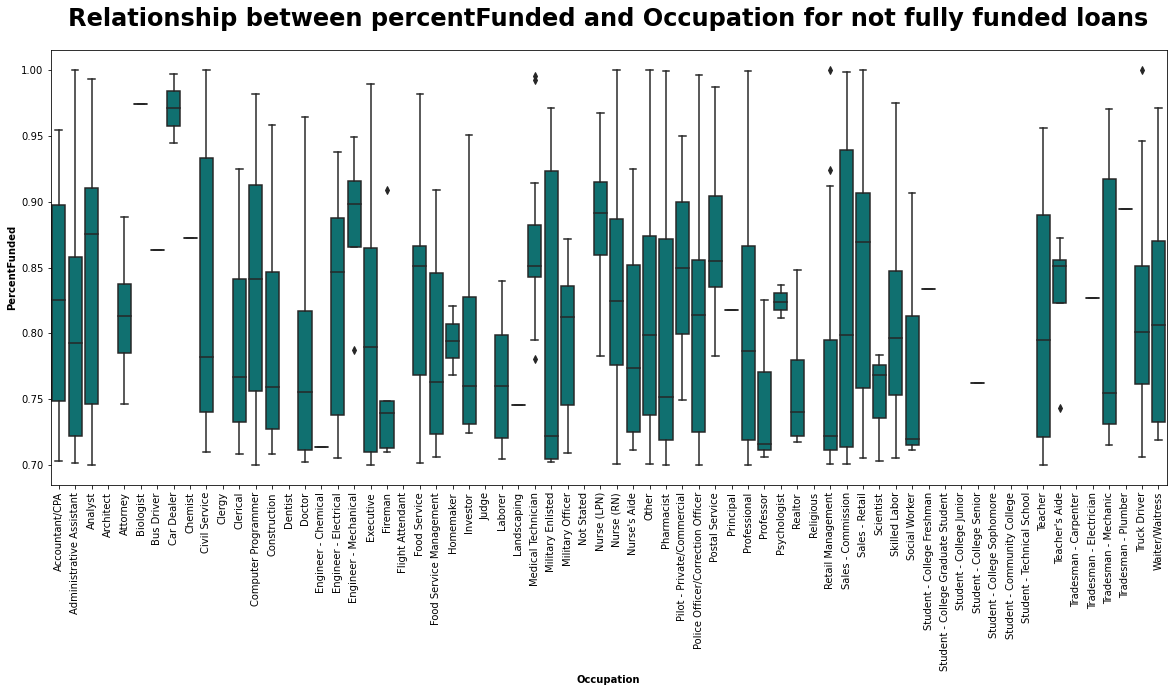

In [15]:
boxplots(20, 8, 'Occupation', 'PercentFunded', not_including_1,
         'Relationship between percentFunded and Occupation for not fully funded loans')

In [16]:
def vari(col = None, numerical = False, facet = False, minimum = None, pad = None):
    
    plt.figure(figsize = (10,5))
    if numerical:
        plt.scatter(data = not_including_1, x = 'LenderYield', y = 'PercentFunded', c = col, \
           cmap = 'Accent', vmin = minimum)
        plt.colorbar(label = col)
    elif facet:
        g = sb.FacetGrid(data = not_including_1, col = col, col_wrap =3)
        g.map(sb.regplot, 'LenderYield', 'PercentFunded')
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad = pad)
    else:
        sb.scatterplot(x = 'LenderYield', y = 'PercentFunded', data = not_including_1,\
                       hue = col, s = 70);
    if not facet:
        plt.title(f'Relationship between LenderYield, PercentFunded and {col}',
                 fontdict = {'weight': 'bold'}, pad  = 10)
        plt.xlabel('LenderYield', fontdict = {'weight':'bold'})
        plt.ylabel('PercentFunded', fontdict = {'weight':'bold'});
    plt.legend(loc = 'right', bbox_to_anchor = (1.5,1))

## Relationship between Lender Yield, Percent Funded and Prosper Rating (Alpha)

- All ratings had the same range of PercentFunded except E that had the least PercentFUnded to be above 70%, From AA to HR there's decrease in LenderYield

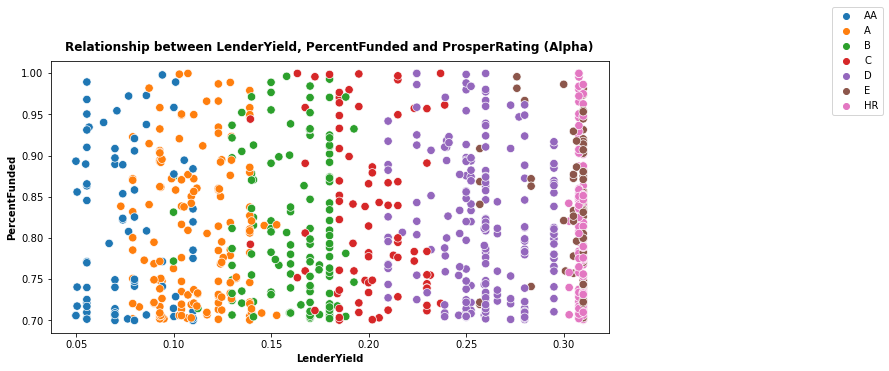

In [17]:
vari('ProsperRating (Alpha)')

## Relationship between Lender Yield, Percent Funded and Currently in group

- Most loans of borrowers in groups had lower Lender Yield, but for not fully funded loans their percentfunded is between 72% and 97%.

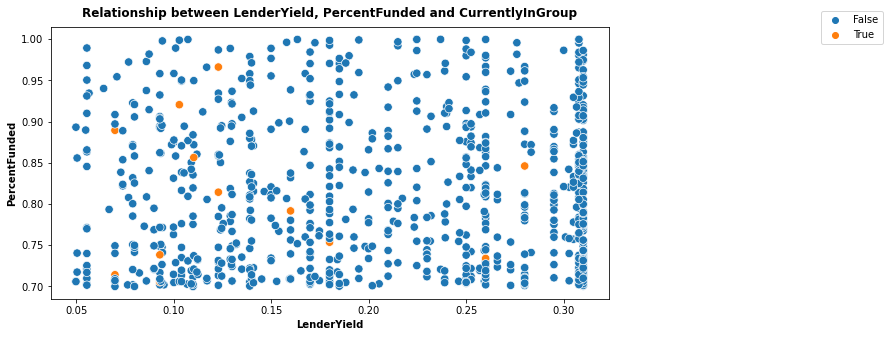

In [18]:
vari('CurrentlyInGroup')

## Relationship between Lender Yield, Percent Funded and Total Credit in past 7Years

-Most loans with totalcredit between 65 and 75 have low Funds percent less than 75%, loans with totalcredit between 35 and 45 have high Funds percent above than 85%

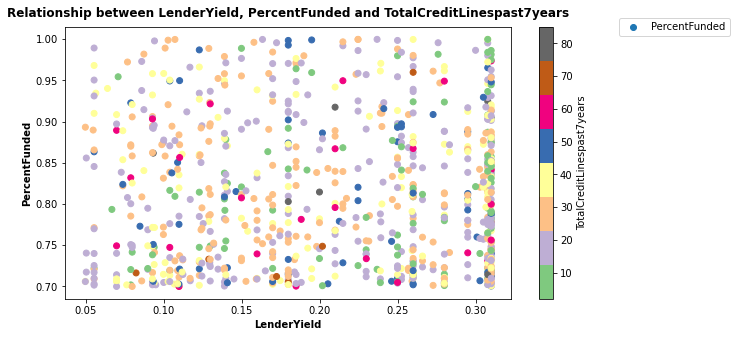

In [19]:
vari(numerical= True, col= 'TotalCreditLinespast7years')

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_Slide_Deck_Template.ipynb --to slides --post serve --no-input --no-prompt